In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import json

from sharkfin.simulation import visualize_simulation_data

In [15]:
sim_stats = open('../output/20221121-d_sim_stats.txt').read()

In [16]:
sim_stats

'{"error_message": null, "status_code": "0", "q": 2, "r": 60, "market_class": "<class \'sharkfin.markets.MockMarket\'>", "ror_volatility": 0.012113049806190875, "ror_mean": 0.004152056264716345, "dividend_growth_rate": 1.000628, "dividend_std": 0.011988, "seconds": 5, "end_day": 120, "log_return_autocorrelation": -0.23113731066190168, "log_return_squared_autocorrelation": -0.49546151017647744, "(\'aLvl_mean\', \'CRRA=3.33, DiscFac=0.95\')": 1.3064526861218342, "(\'aLvl_mean\', \'CRRA=3.33, DiscFac=0.97\')": 1.299064449816365, "(\'aLvl_mean\', \'CRRA=6.0, DiscFac=0.95\')": 1.5354488513816618, "(\'aLvl_mean\', \'CRRA=6.0, DiscFac=0.97\')": 1.55565258108499, "(\'aLvl_mean\', \'CRRA=8.67, DiscFac=0.95\')": 1.7630170979444821, "(\'aLvl_mean\', \'CRRA=8.67, DiscFac=0.97\')": 1.6621323496129663, "(\'aLvl_std\', \'CRRA=3.33, DiscFac=0.95\')": 0.9024351048870185, "(\'aLvl_std\', \'CRRA=3.33, DiscFac=0.97\')": 0.9391723235174021, "(\'aLvl_std\', \'CRRA=6.0, DiscFac=0.95\')": 0.9623970354557221, 

In [17]:
json.loads(sim_stats)

{'error_message': None,
 'status_code': '0',
 'q': 2,
 'r': 60,
 'market_class': "<class 'sharkfin.markets.MockMarket'>",
 'ror_volatility': 0.012113049806190875,
 'ror_mean': 0.004152056264716345,
 'dividend_growth_rate': 1.000628,
 'dividend_std': 0.011988,
 'seconds': 5,
 'end_day': 120,
 'log_return_autocorrelation': -0.23113731066190168,
 'log_return_squared_autocorrelation': -0.49546151017647744,
 "('aLvl_mean', 'CRRA=3.33, DiscFac=0.95')": 1.3064526861218342,
 "('aLvl_mean', 'CRRA=3.33, DiscFac=0.97')": 1.299064449816365,
 "('aLvl_mean', 'CRRA=6.0, DiscFac=0.95')": 1.5354488513816618,
 "('aLvl_mean', 'CRRA=6.0, DiscFac=0.97')": 1.55565258108499,
 "('aLvl_mean', 'CRRA=8.67, DiscFac=0.95')": 1.7630170979444821,
 "('aLvl_mean', 'CRRA=8.67, DiscFac=0.97')": 1.6621323496129663,
 "('aLvl_std', 'CRRA=3.33, DiscFac=0.95')": 0.9024351048870185,
 "('aLvl_std', 'CRRA=3.33, DiscFac=0.97')": 0.9391723235174021,
 "('aLvl_std', 'CRRA=6.0, DiscFac=0.95')": 0.9623970354557221,
 "('aLvl_std', 'CR

In [19]:
data = pd.read_csv('../output/20221121-d_data.csv')

In [20]:
data

,Unnamed: 0,t,prices,dividends,buy,sell,ror,buy_macro,sell_macro,owned,total_assets,mean_income,total_consumption,expected_ror,expected_std
0,0,0,101.362106,0.084468,130,89,0.014466,0,0,8131.919924,1.141081e+06,4088.078018,29539.032794,0.001149,0.012041
1,1,1,100.620451,0.083850,166,10,-0.006490,0,3,8290.770134,1.138007e+06,4108.300480,30140.937233,0.000861,0.011909
2,2,2,102.626824,0.085522,193,3,0.020790,0,0,8446.667765,1.154037e+06,4100.352516,33568.150215,0.001612,0.012250
3,3,3,101.225835,0.084355,92,35,-0.012829,0,34,8533.763406,1.142474e+06,4100.212941,24707.317920,0.001068,0.012355
4,4,4,100.309539,0.083591,131,10,-0.008226,0,4,8645.254865,1.136188e+06,4105.659061,43129.568394,0.000718,0.012255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,115,148.396638,0.123664,6,21,0.006408,0,21,9115.064857,1.394417e+06,4003.309854,0.000000,0.004310,0.012354
116,116,116,147.203440,0.122670,37,40,-0.007214,0,40,9096.133063,1.377438e+06,3998.153902,0.000000,0.003876,0.012317
117,117,117,146.188249,0.121824,5,56,-0.006069,0,56,9085.861853,1.366972e+06,3998.426609,0.000000,0.003502,0.012232
118,118,118,146.888849,0.122407,14,15,0.005630,0,15,9055.742880,1.373459e+06,4015.410755,0.000000,0.003582,0.012006


In [21]:
data.columns

Index(['Unnamed: 0', 't', 'prices', 'dividends', 'buy', 'sell', 'ror',
       'buy_macro', 'sell_macro', 'owned', 'total_assets', 'mean_income',
       'total_consumption', 'expected_ror', 'expected_std'],
      dtype='object')

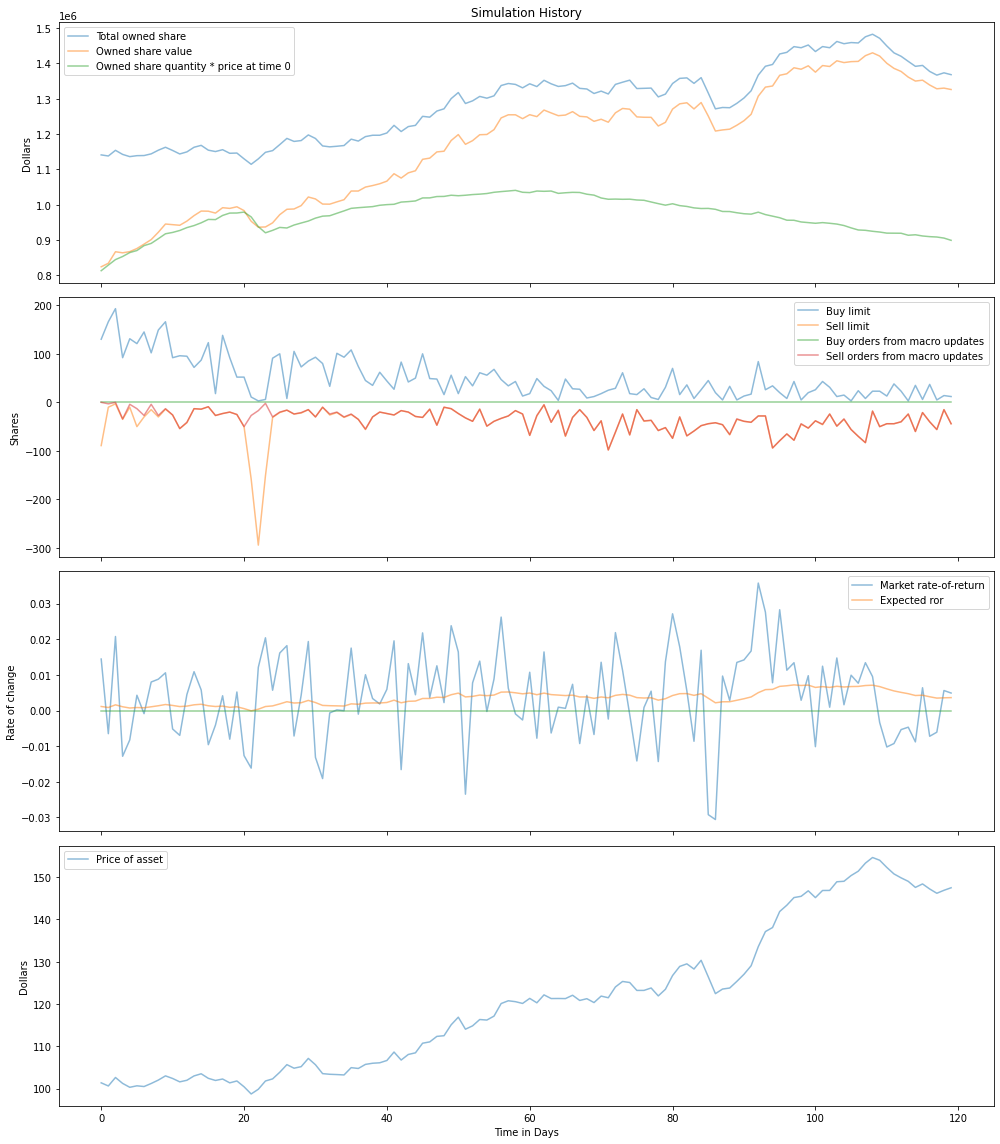

In [25]:
visualize_simulation_data(data)